<a href="https://colab.research.google.com/github/Ercanuca/sislab/blob/main/Colaboratory'ye_Ho%C5%9F_Geldiniz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Colaboratory nedir?</h1>

Colaboratory &#40;ya da kısaca "Colab"&#41;, tarayıcınızda Python'u yazmanızı ve çalıştırmanızı sağlar. Üstelik: 
- Hiç yapılandırma gerektirmez
- GPU'lara ücretsiz erişim imkanı sunar
- Kolay paylaşım imkanı sunar

İster <strong>öğrenci</strong> ister <strong>veri bilimci</strong> ister <strong>yapay zeka araştırmacısı</strong> olun, Colab işinizi kolaylaştırabilir. Daha fazla bilgi edinmek için <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab'e Giriş</a> videosunu izleyebilir ya da aşağıdan hemen kullanmaya başlayabilirsiniz.

## <strong>Başlarken</strong>

Okuduğunuz doküman statik bir web sayfası değil, kod yazmanıza ve yürütmenize imkan veren <strong>Colab not defteri</strong> adında etkileşimli bir ortamdır.

Örneğin, buradaki <strong>kod hücresinde</strong>, bir değeri hesaplayan, bir değişken içinde saklayan ve sonucu yazdıran kısa bir Python dizesi görebilirsiniz:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Yukarıdaki hücrede kodu yürütmek için tıklayarak seçin, ardından ya kodun sol tarafındaki oynat düğmesine basın ya da "Command/Ctrl+Enter" klavye kısayolunu kullanın. Kodu düzenlemek için hücreyi tıklamanız yeterlidir. Sonrasında düzenlemeye başlayabilirsiniz.

Bir hücrede tanımladığınız değişkenler daha sonra başka hücrelerde kullanılabilir:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab not defterleri; <strong>yürütülebilir kod</strong>, <strong>zengin metin</strong>, <strong>resimler</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> ve diğer öğeleri tek bir dokümanda birleştirmenizi sağlar. Oluşturduğunuz Colab not defterleri Google Drive hesabınızda saklanır. Colab not defterlerinizi arkadaşlarınızla veya iş arkadaşlarınızla kolayca paylaşabilir, not defterlerinize yorum yapmalarını, hatta düzenlemelerini sağlayabilirsiniz. Daha fazla bilgiyi <a href="/notebooks/basic_features_overview.ipynb">Colab'e Genel Bakış</a> bölümünde bulabilirsiniz. Yeni bir Colab not defteri oluşturmak için yukarıdaki Dosya menüsünü ya da <a href="http://colab.research.google.com#create=true">yeni bir Colab not defteri oluşturma</a> bağlantısını kullanabilirsiniz.

Colab not defterleri, Colab tarafından barındırılan Jupyter not defterleridir. Jupyter projesi hakkında daha fazla bilgiyi <a href="https://www.jupyter.org">jupyter.org</a> adresinde bulabilirsiniz.

## Veri bilimi

Colab ile popüler Python kitaplıklarının tüm avantajlarından yararlanarak veri analiz edip görselleştirebilirsiniz. Aşağıdaki kod hücresi rastgele veri oluşturmak için <strong>numpy</strong>'yi, bu veriyi görselleştirmek için de <strong>matplotlib</strong>'i kullanır. Kodu düzenlemek için hücreyi tıklamanız yeterlidir. Sonrasında düzenlemeye başlayabilirsiniz.

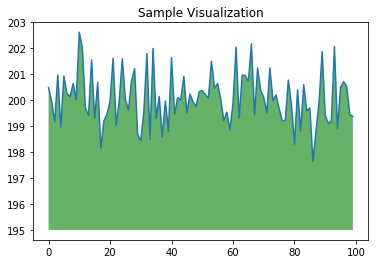

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

Kendi verilerinizi Google Drive hesabınızdan &#40;e-tablolar dahil&#41;, GitHub'dan ve diğer pek çok kaynaktan Colab not defterlerine aktarabilirsiniz. Veri içe aktarma ve Colab'in veri bilimi için nasıl kullanılabileceği hakkında daha fazla bilgi edinmek için <a href="#working-with-data">Verilerle Çalışma</a> bölümünün altındaki bağlantılara bakabilirsiniz.

## Makine öğrenimi

Colab ile bir resim veri kümesini içe aktarabilir, üzerinde bir resim sınıflandırıcıyı eğitebilir ve modeli değerlendirebilirsiniz. Hem de sadece <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">birkaç satır kodla</a>. Colab not defterleri Google'ın bulut sunucularında kod yürütür. Yani makinenizin gücünden bağımsız olarak, <a href="#using-accelerated-hardware">GPU'lar ve TPU'lar</a> dahil Google donanımının gücünden yararlanabilirsiniz. Tek ihtiyacınız olan şey bir tarayıcıdır.

Colab, makine öğrenimi topluluğunda yaygın olarak şu uygulamalarla kullanılır:
- TensorFlow'u kullanmaya başlama
- Nöral ağ geliştirme ve eğitme
- TPU'lar ile deneme yapma
- Yapay zeka araştırmalarını yayma
- Eğitici oluşturma

Makine öğrenimi uygulamalarını açıklayarak tanıtan örnek Colab not defterlerini görmek için aşağıdaki <a href="#machine-learning-examples">makine öğrenimi örneklerine</a> bakabilirsiniz.

## Diğer Kaynaklar

### Colab'de Not Defterleriyle Çalışma
- [Colaboratory'ye Genel Bakış](/notebooks/basic_features_overview.ipynb)
- [Markdown rehberi](/notebooks/markdown_guide.ipynb)
- [Kitaplıkları içe aktarma ve bağımlıları yükleme](/notebooks/snippets/importing_libraries.ipynb)
- [GitHub'da not defteri kaydetme ve yükleme](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Etkileşimli formlar](/notebooks/forms.ipynb)
- [Etkileşimli widget'lar](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [Colab'de TensorFlow 2](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Verilerle Çalışma
- [Veri yükleme: Drive, E-Tablolar ve Google Cloud Storage](/notebooks/io.ipynb) 
- [Grafikler: Veri görselleştirme](/notebooks/charts.ipynb)
- [BigQuery'yi kullanmaya başlama](/notebooks/bigquery.ipynb)

### Makine Öğrenimi Hızlandırılmış Kursu
Google'ın online Makine Öğrenimi kursundan birkaç not defterini burada bulabilirsiniz. Daha fazlası için <a href="https://developers.google.com/machine-learning/crash-course/">tam kurs web sitesine</a> bakın.
- [Pandas DataFrame'e giriş](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Sentetik veriler kullanarak tf.keras ile doğrusal regresyon](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Hızlandırılmış Donanım Kullanma
- [GPU'lar ile TensorFlow](/notebooks/gpu.ipynb)
- [TPU'lar ile TensorFlow](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Makine Öğrenimi Örnekleri

Colaboratory'nin mümkün kıldığı etkileşimli makine öğrenimi analizlerinin uçtan uca örneklerini görmek için, <a href="https://tfhub.dev">TensorFlow Hub</a>'daki modelleri kullanan bu eğiticilere bakın.

Öne çıkan birkaç örnek:

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Bir Resim Sınıflandırıcıyı Yeniden Eğitme</a>: Çiçekleri ayırt etmek için önceden eğitilmiş bir resim sınıflandırıcının üzerine bir Keras modeli inşa eder.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Metin Sınıflandırma</a>: IMDB'deki film yorumlarını <em>olumlu</em> veya <em>olumsuz</em> olarak sınıflandırır.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Stil Aktarımı</a>: Resimler arasında stil aktarımı yapmak için derin öğrenmeyi kullanır.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Çok Dilli Evrensel Cümle Kodlayıcı Soru-Cevap</a>: SQuAD veri kümesinden soruları cevaplamak için bir makine öğrenimi modeli kullanır.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video İnterpolasyonu</a>: Bir videonun ilk ve son karesi arasında ne olduğunu tahmin eder.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas


In [2]:
df = pandas.read_csv('https://raw.githubusercontent.com/irhallac/SisLab/main/hw_data/data_0123.csv', header=None)

In [37]:
df

,0,1,2,3,4,5,6,7
0,NaN,ozellik-1,ozellik-2,ozellik-3,ozellik-4,ozellik-5,ozellik-6,cikis
1,0.0,-7.43524376807876,-4.174863989374225,8.681144350265372,0.6689198460442981,-6.065572194257408,-2.1846252877118433,0
2,1.0,8.391228868187953,-9.339413646962674,-0.7081285456529649,1.7401474836179736,-3.4131668349248616,-7.336958698185232,1
3,2.0,-5.634695743414545,-3.565606355429833,9.664936352717044,2.732507047261708,-6.960467400518391,-0.8733563835962883,0
4,3.0,-6.330259003798252,-3.8256599344938773,9.589395582499485,0.9173987646197139,-6.954611368784061,-1.565933397485238,0
...,...,...,...,...,...,...,...,...
94,93.0,8.503909184457228,-9.336052548492042,-0.8757955902189782,1.8509760002631763,-4.714561400297591,-5.387236360241952,1
95,94.0,-7.164673617402079,-4.588733694935779,10.326705183017737,1.0559655081441597,-6.221009050070445,-3.4115196336723046,0
96,95.0,8.095333790965675,-9.62138198190637,0.9356796711657802,3.3340071814904526,-4.308568796330791,-7.683909011540598,1
97,96.0,-6.126117305793422,-3.855354201884977,10.318826739106612,2.963437093088043,-6.576239889779095,-2.5396168368122796,0


In [46]:
cikis = df.iloc[1:100, 7].values #1 ile 100 elemanı alarak 7 özelliği verdik. 
giris = df.iloc[1:100, [2,4, 6]].values # 2,3 ve 6. özellikleri giris olarak belirledik

giris = giris.astype(float) # gelen degerler string olduğu için float'a dönüştürdük.
cikis = cikis.astype(float)

In [20]:
#185260050 ERCAN UCA 

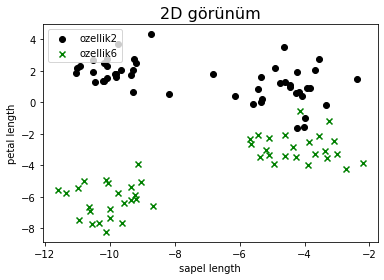

In [47]:
plt.title('2D görünüm', fontsize=16)

plt.scatter(giris[:50, 0], giris[:50, 1], color='black', marker='o', label='ozellik2')
plt.scatter(giris[50:100, 0], giris[50:100, -1], color='green', marker='x', label='ozellik6')

plt.xlabel('sapel length')
plt.ylabel('petal length')
plt.legend(loc='upper left')

plt.show()

In [48]:
class Perceptron(object): 
    def __init__(self, ogrenme_orani=0.1, iter_sayisi=10):
        self.ogrenme_orani = ogrenme_orani
        self.iter_sayisi = iter_sayisi

        #ogrenme oranı ve iterasyon sayisini atadık

    def ogren(self, X, y):
        self.w = np.zeros(1 + X.shape[1])
        #ağırlık değerleri ve bias değerleri belirlenir
        self.hatalar = []
        for _ in range(self.iter_sayisi):
            hata = 0
            for xi, hedef in zip(X, y):
                degisim = self.ogrenme_orani * (hedef - self.tahmin(xi))
                self.w[1:] += degisim * xi
                self.w[0] += degisim
                hata += int(degisim != 0.0)
            self.hatalar.append(hata)
        return self

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def tahmin(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, 0) # çıkış değerlerimiz 0-1 olduğundan dolayı

In [49]:
siniflandirici = Perceptron(ogrenme_orani=0.1, iter_sayisi=10) #siniflandiricimiza öğrenme oranı ve iterasyon sayısını verdik

In [50]:
siniflandirici.ogren(giris, cikis)

In [51]:
siniflandirici.w

array([-3.7       , -0.30243229, -0.13469308, -0.33269782])

In [52]:
siniflandirici.hatalar # 7. iterasyondan sonra hata değerimiz 0'a indi. Makine 7. iterasyondan sonra öğrenmeye başladı

[42, 6, 32, 7, 3, 6, 3, 0, 0, 0]

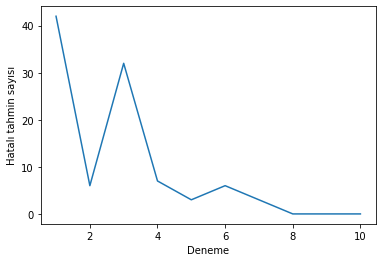

In [53]:
plt.plot(range(1, len(siniflandirici.hatalar) + 1), siniflandirici.hatalar)
plt.xlabel('Deneme')
plt.ylabel('Hatalı tahmin sayısı')
plt.show()

